# Game Recommendation Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.cluster import MeanShift
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

### Data Import and Analysis

In [2]:
games_df=pd.read_csv("/content/drive/MyDrive/imdb-videogames.csv")

In [3]:
games_df.drop('Unnamed: 0',axis=1,inplace=True)
games_df.drop("url",axis=1,inplace=True)

In [4]:
games_df

,name,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,Spider-Man,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,Red Dead Redemption II,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,Grand Theft Auto V,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,God of War,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,Uncharted 4: A Thief's End,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20798,"Enjoy Your Power, Enjoy Your Choice",2014.0,NaN,NaN,NaN,Add a Plot,False,False,False,False,False,False,False,False,True
20799,RedSun2020,2004.0,NaN,NaN,NaN,Joseph gets kidnapped and it's the player's jo...,False,False,False,False,False,False,False,False,True
20800,Shutter,2015.0,NaN,NaN,NaN,A tech support man who uses a drone to investi...,False,False,False,False,False,False,False,False,True
20801,The Music Machine,2015.0,NaN,NaN,NaN,A young teenage girl and the ghost of a dead m...,False,False,False,False,False,False,False,False,True


In [5]:
games_df.isna().sum()

name               0
year             267
certificate    12900
rating          9203
votes           9203
plot               0
Action             0
Adventure          0
Comedy             0
Crime              0
Family             0
Fantasy            0
Mystery            0
Sci-Fi             0
Thriller           0
dtype: int64

In [6]:
games_df["certificate"] = pd.CategoricalIndex(games_df["certificate"])
games_df['certificate'] = games_df.certificate.cat.codes
games_df["votes"].fillna(0,inplace=True)
games_df["votes"]=games_df["votes"].replace("[\,]","",regex=True).astype(int)
games_df["Action"] = pd.CategoricalIndex(games_df["Action"])
games_df['Action'] = games_df.Action.cat.codes
games_df["Adventure"] = pd.CategoricalIndex(games_df["Adventure"])
games_df['Adventure'] = games_df.Adventure.cat.codes
games_df["Comedy"] = pd.CategoricalIndex(games_df["Comedy"])
games_df['Comedy'] = games_df.Comedy.cat.codes
games_df["Crime"] = pd.CategoricalIndex(games_df["Crime"])
games_df['Crime'] = games_df.Crime.cat.codes
games_df["Family"] = pd.CategoricalIndex(games_df["Family"])
games_df['Family'] = games_df.Family.cat.codes
games_df["Fantasy"] = pd.CategoricalIndex(games_df["Fantasy"])
games_df['Fantasy'] = games_df.Fantasy.cat.codes
games_df["Mystery"] = pd.CategoricalIndex(games_df["Mystery"])
games_df['Mystery'] = games_df.Mystery.cat.codes
games_df["Sci-Fi"] = pd.CategoricalIndex(games_df["Sci-Fi"])
games_df['Sci-Fi'] = games_df['Sci-Fi'].cat.codes
games_df["Thriller"] = pd.CategoricalIndex(games_df["Thriller"])
games_df['Thriller'] = games_df.Thriller.cat.codes

In [7]:
games_df.dtypes

name            object
year           float64
certificate       int8
rating         float64
votes            int64
plot            object
Action            int8
Adventure         int8
Comedy            int8
Crime             int8
Family            int8
Fantasy           int8
Mystery           int8
Sci-Fi            int8
Thriller          int8
dtype: object

In [8]:
titles=games_df["name"]
plots=games_df["plot"]
games_df.drop("name",axis=1,inplace=True)
games_df.drop("plot",axis=1,inplace=True)

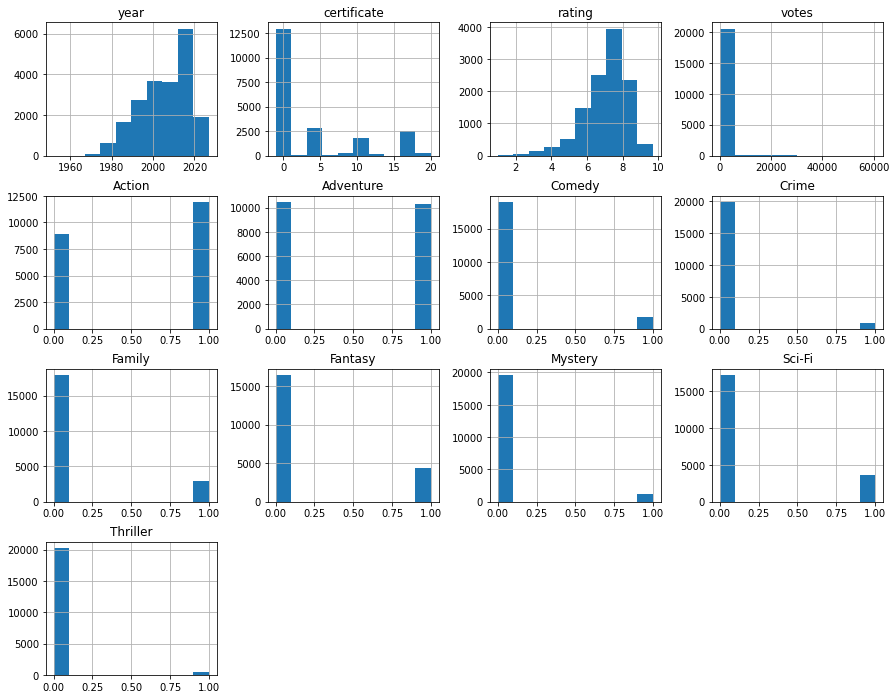

In [9]:
games_df.hist(figsize=(15,12));

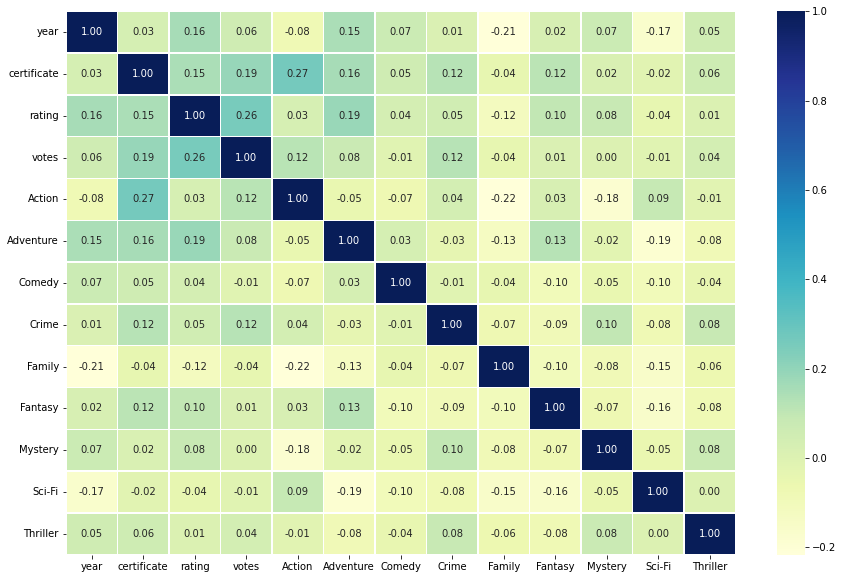

In [10]:
corr_matrix=games_df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

### Clustering Games Based only on Numerical Data

In [11]:
games_df["year"].fillna(games_df["year"].median(),inplace=True)
games_df["rating"].fillna(games_df["rating"].median(),inplace=True)

In [12]:
games_arr=[]
col_names=games_df.columns
for cols in col_names:
    arrs=[]
    for i in games_df[cols]:
        arrs.append(i)
    games_arr.append(arrs)

In [14]:
temp_games=[]
for i in range(len(games_arr[0])):
    arr=[]
    for ii in range(len(games_arr)):
        arr.append(games_arr[ii][i])
    temp_games.append(arr)

In [15]:
games_arr=temp_games
temp_games=np.array([np.array(xi) for xi in games_arr])
games_arr=temp_games

#### Clustering 1

In [35]:
clustering_1=MeanShift().fit(games_arr)
clustering_1.labels_

array([25, 32, 33, ...,  0,  0,  0])

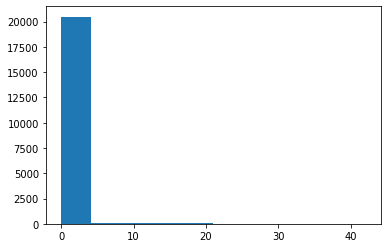

In [39]:
plt.hist(clustering_1.labels_);

#### Clustering 2

In [40]:
clustering_2=KMeans(n_clusters=4).fit(games_arr)
clustering_2.labels_

array([1, 1, 2, ..., 0, 0, 0], dtype=int32)

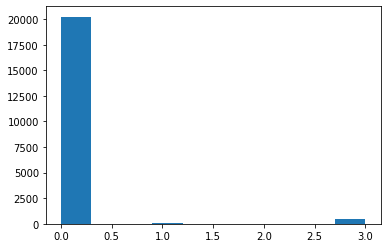

In [41]:
plt.hist(clustering_2.labels_);

#### Clustering 3

In [43]:
clustering_3=KMeans(n_clusters=6,n_init=100,max_iter=500).fit(games_arr)
clustering_3.labels_

array([5, 1, 3, ..., 0, 0, 0], dtype=int32)

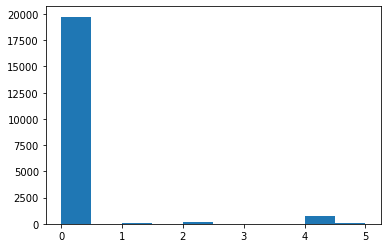

In [44]:
plt.hist(clustering_3.labels_);

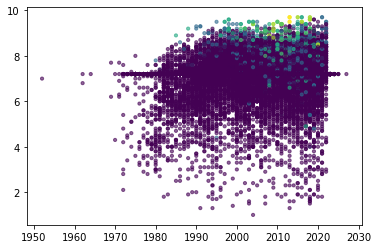

In [46]:
df=games_df
df['cluster']=clustering_3.labels_
centroids = clustering_3.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4], 5:cen_x[5]})
df['cen_y'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4], 5:cen_x[5]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF','#0000FF','#458B74','#E3CF57']
df['c'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4], 5:cen_x[5]})
plt.scatter(df["year"], df["rating"], c=df.c, alpha = 0.6, s=10);

## Clustering Based On Text

### Method 1 of Text Representation

In [39]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

In [17]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(plots)

In [18]:
true_k = 4
model1 = KMeans(n_clusters=true_k, init='k-means++', max_iter=100)
model1.fit(X)

KMeans(max_iter=100, n_clusters=4)

In [19]:
print("Top terms per cluster:")
order_centroids = model1.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 add
 plot
 état
 festering
 fernandez
 fernando
 ferocious
 ferrari
 ferrik
 ferry
Cluster 1:
 new
 world
 york
 game
 summary
 city
 characters
 adventure
 set
 series
Cluster 2:
 summary
 world
 evil
 play
 save
 time
 war
 fight
 adventure
 set
Cluster 3:
 game
 video
 based
 action
 series
 summary
 player
 adventure
 play
 fighting


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


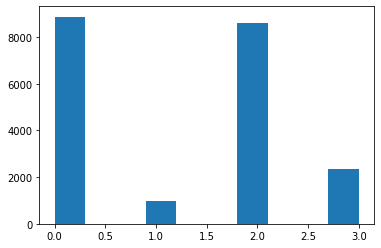

In [20]:
plt.hist(model1.labels_);

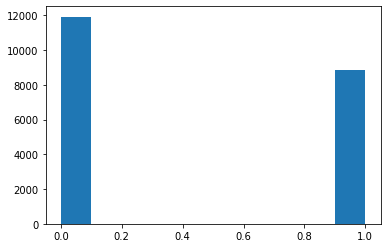

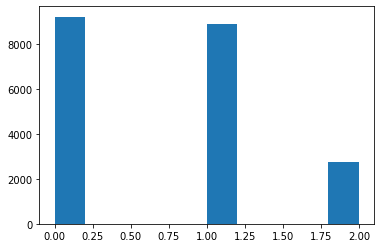

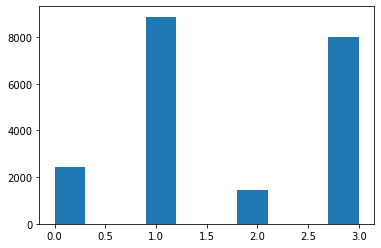

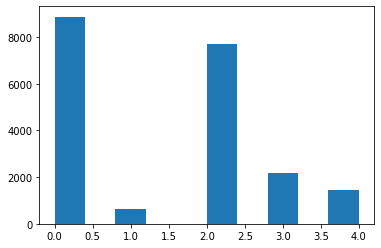

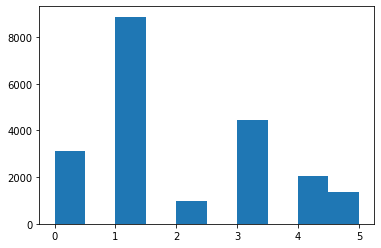

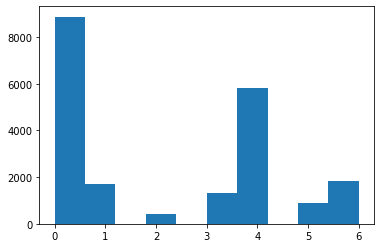

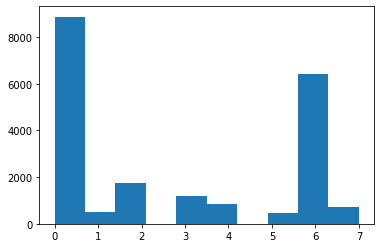

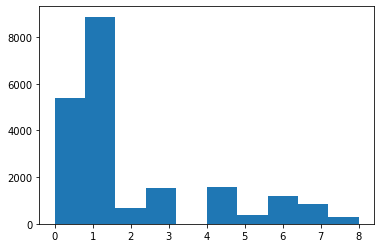

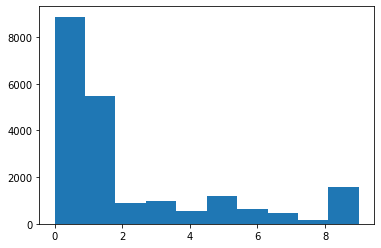

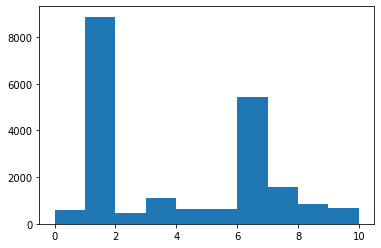

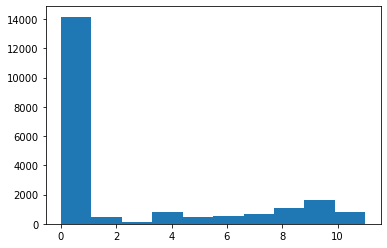

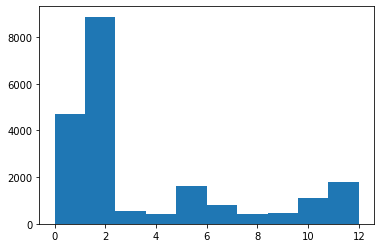

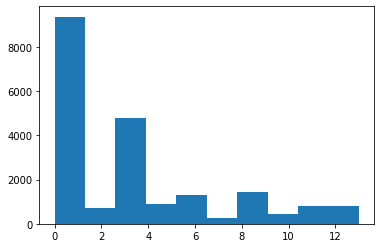

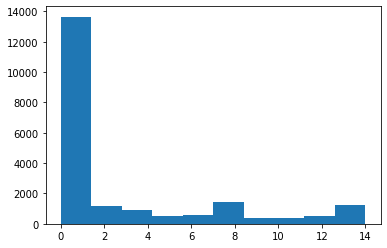

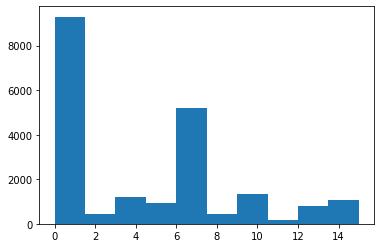

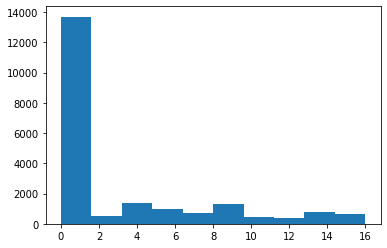

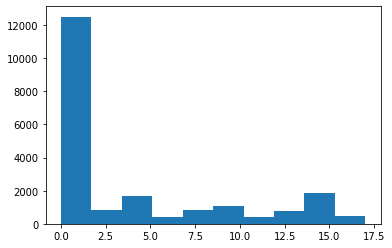

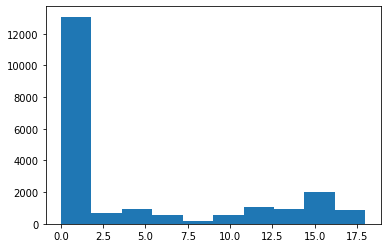

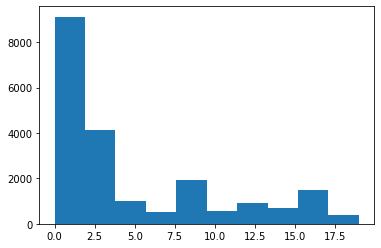

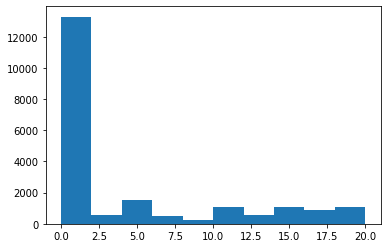

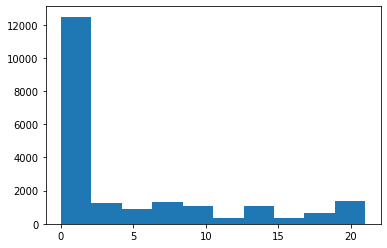

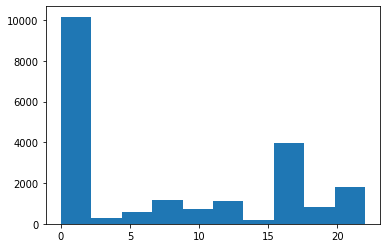

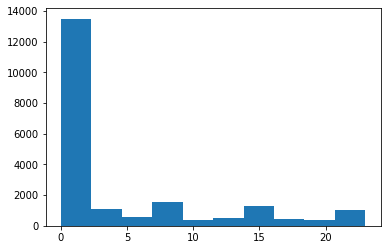

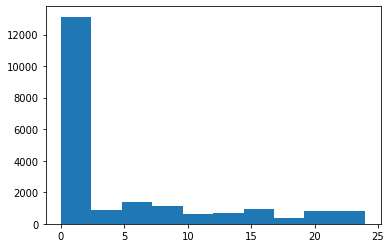

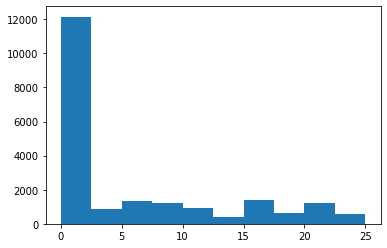

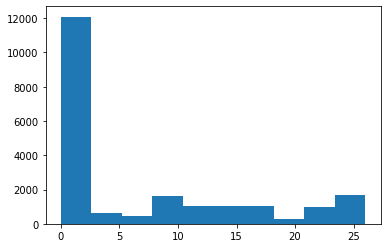

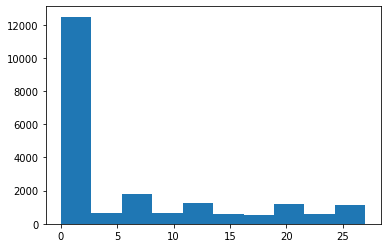

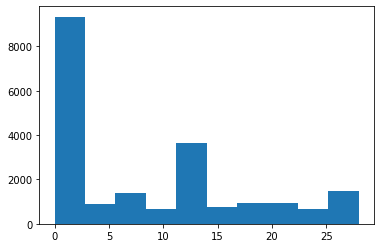

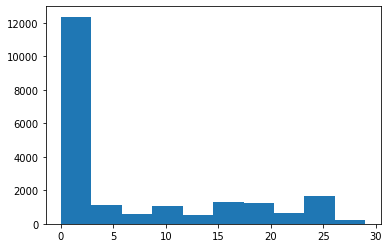

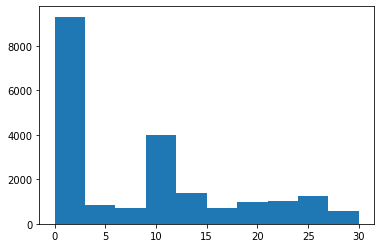

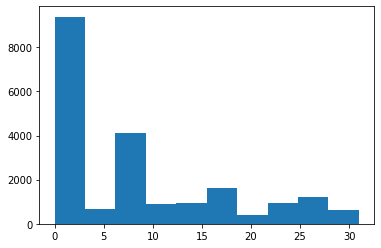

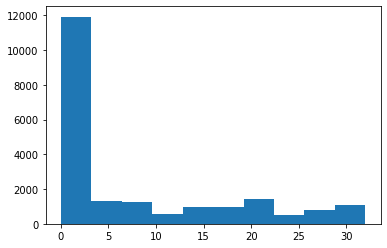

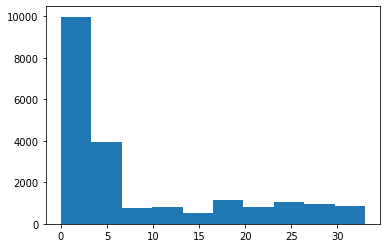

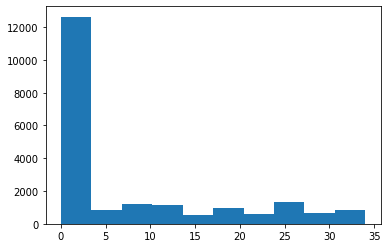

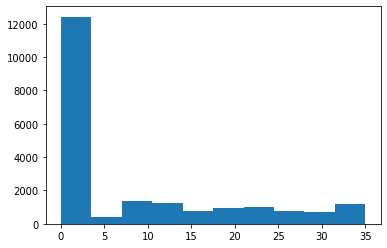

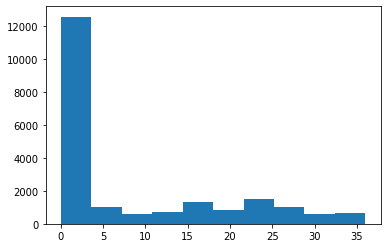

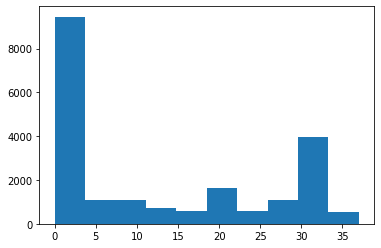

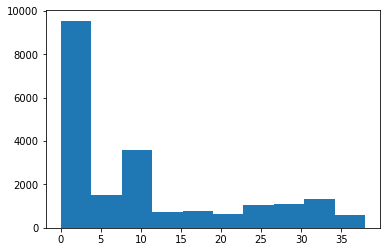

In [21]:
for true_k in range(2,40):
  modelk = KMeans(n_clusters=true_k, init='k-means++', max_iter=100)
  modelk.fit(X)
  plt.hist(modelk.labels_);
  plt.show();

In [22]:
true_k = 5
model1 = KMeans(n_clusters=true_k, init='k-means++', max_iter=100)
model1.fit(X)
print("Top terms per cluster:")
order_centroids = model1.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 summary
 new
 evil
 play
 city
 time
 save
 fight
 help
 way
Cluster 1:
 add
 plot
 état
 festering
 fernandez
 fernando
 ferocious
 ferrari
 ferrik
 ferry
Cluster 2:
 adventure
 game
 action
 world
 based
 click
 summary
 point
 new
 set
Cluster 3:
 game
 video
 based
 series
 summary
 action
 play
 player
 fighting
 players
Cluster 4:
 world
 summary
 war
 save
 new
 set
 game
 evil
 stop
 dark


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##### Application that lists similar games like one passed as argument (numeric version from DF) based on first method for text vectorization

In [23]:
game_number=int(input("Game Number = "))
try:
    label=model1.labels_
    label=label[game_number]
    games_to_recommend=[]
    for i in range(len(titles)):
        if model1.labels_[i]==label:
            games_to_recommend.append(titles[i])
    print("\nOther games you might like:\n")
    games=''
    for i in games_to_recommend:
        games+=i
        games+="\n"
    print(games)
except:
    print("Incorrect argument, game numbers can only be integers in range from 0 to ~20000")

Game Number = 3

Other games you might like:

God of War
Horizon Forbidden West
The Last of Us
Death Stranding
Elden Ring
Xenoblade Chronicles 3
The Witcher 3: Wild Hunt
Command & Conquer: Red Alert 3
Horizon Zero Dawn
Marvel's Avengers
Assassin's Creed: Odyssey
Resident Evil Village
Mortal Kombat 11
Injustice 2
Dying Light 2: Stay Human
Batman: Arkham Origins
Call of Duty: WWII
Dragon Age: Inquisition
Tekken 7
Dying Light
Devil May Cry 5
Doom
Shadow of the Tomb Raider
Wolfenstein: The New Order
Kingdom Hearts
Hogwarts Legacy
NieR: Automata
Call of Duty: Advanced Warfare
Command & Conquer: Red Alert 3 - Uprising
Injustice: Gods Among Us
The Evil Within
The Matrix Awakens: An Unreal Engine 5 Experience
Halo: Combat Evolved
Metal Gear Solid 4: Guns of the Patriots
Gears 5
Xenoblade Chronicles
Final Fantasy XIV: Endwalker
Rainbow Six: Siege
Sonic Adventure 2
Returnal
Brütal Legend
Fast and Furious Crossroads
Grand Theft Auto
Conker's Bad Fur Day
Battlefield 2042
NieR Replicant: ver.1.2247

##### Application that lists similar games like one passed as argument (title version from DF) based on first method for text vectorization

In [34]:
game_titl=input("Game Title = ")
titles=list(titles)
try:
    label=model1.labels_
    label=label[titles.index(game_titl)]
    games_to_recommend=[]
    for i in range(len(titles)):
        if model1.labels_[i]==label:
            games_to_recommend.append(titles[i])
    print("\nOther games you might like:\n")
    games=''
    for i in games_to_recommend:
        games+=i
        games+="\n"
    print(games)
except:
    print("Incorrect argument, game not in database")

Game Title = Noita

Other games you might like:

God of War
Horizon Forbidden West
The Last of Us
Death Stranding
Elden Ring
Xenoblade Chronicles 3
The Witcher 3: Wild Hunt
Command & Conquer: Red Alert 3
Horizon Zero Dawn
Marvel's Avengers
Assassin's Creed: Odyssey
Resident Evil Village
Mortal Kombat 11
Injustice 2
Dying Light 2: Stay Human
Batman: Arkham Origins
Call of Duty: WWII
Dragon Age: Inquisition
Tekken 7
Dying Light
Devil May Cry 5
Doom
Shadow of the Tomb Raider
Wolfenstein: The New Order
Kingdom Hearts
Hogwarts Legacy
NieR: Automata
Call of Duty: Advanced Warfare
Command & Conquer: Red Alert 3 - Uprising
Injustice: Gods Among Us
The Evil Within
The Matrix Awakens: An Unreal Engine 5 Experience
Halo: Combat Evolved
Metal Gear Solid 4: Guns of the Patriots
Gears 5
Xenoblade Chronicles
Final Fantasy XIV: Endwalker
Rainbow Six: Siege
Sonic Adventure 2
Returnal
Brütal Legend
Fast and Furious Crossroads
Grand Theft Auto
Conker's Bad Fur Day
Battlefield 2042
NieR Replicant: ver.1.2

##### Application that lists similar games like the new one created based on description based on first method for text vectorization

In [48]:
desc=input("Description, up to 1000 words = ")

Description, up to 1000 words = A shooting game about shooting and guns and lots of bullets


In [49]:
n=int(input("Number of games you want recomended from description = "))

Number of games you want recomended from description = 12


In [50]:
try:
    des=plots
    des=list(des)
    des.append(desc)
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(des)
    nbrs = NearestNeighbors(n_neighbors=n+1, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    games=indices[-1]
    print("\nRecommended Games:\n")
    for i in games:
        try:
            titles[i]
            print(titles[i])
        except:
            pass
except:
    print("Error with number of arguments")

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")



Recommended Games:

.38 Ambush Alley
Stick and Chick
Mystic Midway: Rest in Pieces
Luxor: 5th Passage
Midnight Club 3: DUB Edition
Shoot 'm Up
Apeirophobia
Wacko
King & Balloon
Phoenix
Lucky & Wild
Lethal Enforcers II: Gunfighters


### Method 2 of Text Representation

##### Application that lists similar games like the new one created based on description based on the second method for text vectorization

In [51]:
desc=input("Description, up to 1000 words = ")

Description, up to 1000 words = A shooting game about shooting and guns and lots of bullets


In [52]:
n=int(input("Number of games you want recomended from description = "))

Number of games you want recomended from description = 12


In [53]:
try:
    des=plots
    des=list(des)
    des.append(desc)
    text_vectorizer=TextVectorization(max_tokens=10000,
                                    output_mode="int",
                                    output_sequence_length=30)
    text_vectorizer.adapt(des)
    X = text_vectorizer(des)
    nbrs = NearestNeighbors(n_neighbors=n+1, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    games=indices[-1]
    print("\nRecommended Games:\n")
    for i in games:
        try:
            titles[i]
            print(titles[i])
        except:
            pass
except:
    print("Error with number of arguments")


Recommended Games:

Refunct
The Lego Movie Videogame
The Lego Movie Videogame
Ultima
Street Fighter III: 3rd Strike - Fight for the Future
Pokémon Blue Version
Pokémon Blue Version
Pokémon Red Version
Pokémon Blue Version
Time Gentlemen, Please!
Ib
Marvel Heroes
